In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
%load_ext blackcellmagic

# Configs

In [2]:
plt.rcParams['figure.figsize'] = (14, 7)

# Params

In [3]:
start_year = 2011
end_year = 2020
y = end_year - start_year

# Helpers

In [4]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Data preparation

In [5]:
json_url = "https://raw.githubusercontent.com/collective-action/tech/master/actions.json"
df = pd.read_json(json_url)
df["date"] = pd.to_datetime(df["date"])  # cast date col to datetime64
df.head(20)

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,314,1970-01-01,[https://www.theguardian.com/commentisfree/201...,[resources],"[ethics, discrimination]","[white collar workers, inhouse workers]",Black IBM employees founded the National Black...,NaN,[usa],[ibm],NaN,[antiracism],[nataliyaned],"[[44.05795005, -92.50701462052399]]","[IBM, Rochester, Olmsted County, Minnesota, Un..."
1,313,1970-10-08,[https://www.dissentmagazine.org/online_articl...,"[protest, boycott]",[ethics],"[white collar workers, inhouse workers]",Polaroid workers affiliated with the Polaroid ...,NaN,[cambridge-massachusetts-usa],[polaroid],2.0,"[antiracism, surveillance]",[nataliyaned],None,None
2,322,1970-12-01,[https://archive.scienceforthepeople.org/vol-6...,[union drive],[unfair labor practices],"[white collar workers, blue collar workers]",The Committee to Plan a Computer Union meets t...,NaN,[new york city-new york-usa],None,NaN,None,[nataliyaned],"[[40.7127281, -74.0060152]]","[New York, United States]"
3,323,1973-01-01,[https://archive.scienceforthepeople.org/vol-8...,[union drive],[unfair labor practices],"[white collar workers, inhouse workers]",Workers at Silicon Valley conglomerate Smith-C...,NaN,[california-usa],[smith-corona-marchant],50.0,None,[nataliyaned],None,None
4,1,1979-09-01,[https://twitter.com/clancynewyork/status/1175...,[protest],[ethics],"[white collar workers, inhouse workers]","IBM workers formed an organization, IBM: Speak...",NaN,[worldwide],[ibm],NaN,[international_solidarity],[nataliyaned],None,None
5,2,1986-09-16,[https://www.nytimes.com/1986/09/16/science/so...,[open letter],[ethics],"[white collar workers, inhouse workers]",Fourteen employees at AT&T sign a letter warni...,NaN,[usa],[at&t],14.0,None,[nataliyaned],"[[33.80967965, -117.83605415]]","[AT&T, 1302, North Tustin Street, Orange, Oran..."
6,3,1986-09-16,[https://www.nytimes.com/1986/09/16/science/so...,[open letter],[ethics],[white collar workers],"A group of computer professionals, led by Comp...",NaN,[usa],None,30.0,None,[nataliyaned],"[[39.7837304, -100.4458825]]",[United States]
7,4,1994-01-24,[https://www.nytimes.com/1994/06/12/magazine/b...,[open letter],[ethics],[white collar workers],Computer Professionals for Social Responsibili...,1.0,None,None,50000.0,None,[nataliyaned],None,None
8,5,1998-11-23,[http://www.cnn.com/tech/computing/9811/23/mst...,[legal action],"[unfair labor practices, pay and benefits]",[contract workers],A law firm representing 10 current and former ...,NaN,[usa],[microsoft],10.0,None,[organizejs],"[[35.139622349999996, -80.92306993327955]]","[Microsoft, Ayrsley, Charlotte, Mecklenburg Co..."
9,6,1999-06-04,[https://www.latimes.com/archives/la-xpm-1999-...,[union drive],[pay and benefits],"[white collar workers, contract workers]",A group of temporary workers at Microsoft that...,NaN,[seattle-washington-usa],[microsoft],16.0,[washtech],[nataliyaned],"[[47.5388725, -122.2901728]]","[Microsoft Gathering Hall, 7054, 32nd Avenue S..."


# Clean up

In [6]:
# clean up strings:
df["struggles"] = df["struggles"].astype(str).str.strip("[]\'\'")
df["actions"] = df["actions"].astype(str).str.strip("[]\'\'")
df["companies"] = df["companies"].astype(str).str.strip("[]\'\'")
df["employment_types"] = df["employment_types"].astype(str).str.strip("[]\'\'")
df["sources"] = df["sources"].astype(str).str.strip("[]\'\'")
df["tags"] = df["tags"].astype(str).str.strip("[]\'\'")
df["locations"] = df["locations"].astype(str).str.strip("[]\'\'")

df["struggles"] = df["struggles"].astype(str).str.replace("'", "")
df["actions"] = df["actions"].astype(str).str.replace("'", "")
df["companies"] = df["companies"].astype(str).str.replace("'", "")
df["employment_types"] = df["employment_types"].astype(str).str.replace("'", "")
df["sources"] = df["sources"].astype(str).str.replace("'", "")
df["tags"] = df["tags"].astype(str).str.replace("'", "")
df["locations"] = df["locations"].astype(str).str.replace("'", "")

# add a 'year' column
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

# add precarity label
df["precarious"] = [
    True
    if "blue collar workers" in x.split(", ")
    or "contract workers" in x.split(", ")
    or "gig workers" in x.split(", ")
    else False
    for x in df["employment_types"]
]

# clean up "online" to be true or false
df["online"] = [
    True
    if x == 1
    else False
    for x in df["online"]
]

In [7]:
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses,year,month,precarious
0,314,1970-01-01,https://www.theguardian.com/commentisfree/2019...,resources,"ethics, discrimination","white collar workers, inhouse workers",Black IBM employees founded the National Black...,False,usa,ibm,NaN,antiracism,[nataliyaned],"[[44.05795005, -92.50701462052399]]","[IBM, Rochester, Olmsted County, Minnesota, Un...",1970,1,False
1,313,1970-10-08,https://www.dissentmagazine.org/online_article...,"protest, boycott",ethics,"white collar workers, inhouse workers",Polaroid workers affiliated with the Polaroid ...,False,cambridge-massachusetts-usa,polaroid,2.0,"antiracism, surveillance",[nataliyaned],None,None,1970,10,False
2,322,1970-12-01,https://archive.scienceforthepeople.org/vol-6/...,union drive,unfair labor practices,"white collar workers, blue collar workers",The Committee to Plan a Computer Union meets t...,False,new york city-new york-usa,None,NaN,None,[nataliyaned],"[[40.7127281, -74.0060152]]","[New York, United States]",1970,12,True
3,323,1973-01-01,https://archive.scienceforthepeople.org/vol-8/...,union drive,unfair labor practices,"white collar workers, inhouse workers",Workers at Silicon Valley conglomerate Smith-C...,False,california-usa,smith-corona-marchant,50.0,None,[nataliyaned],None,None,1973,1,False
4,1,1979-09-01,https://twitter.com/clancynewyork/status/11758...,protest,ethics,"white collar workers, inhouse workers","IBM workers formed an organization, IBM: Speak...",False,worldwide,ibm,NaN,international_solidarity,[nataliyaned],None,None,1979,9,False


# Show actions per year

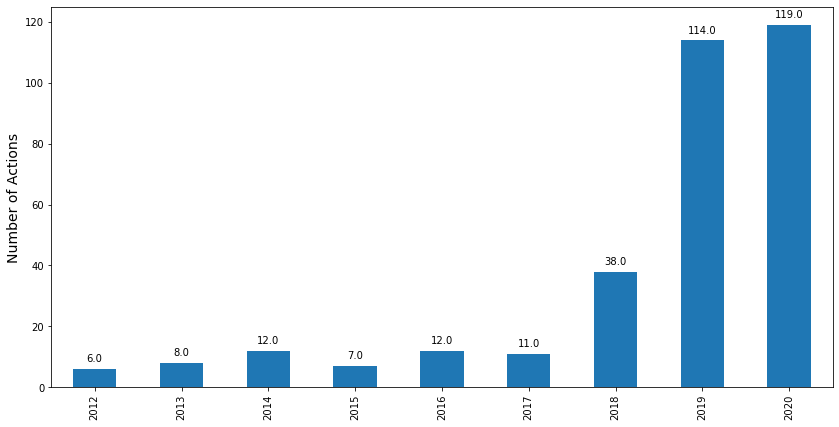

In [8]:
_df = df["year"].value_counts(sort=False)[-y:]
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Show actions per year by precarity

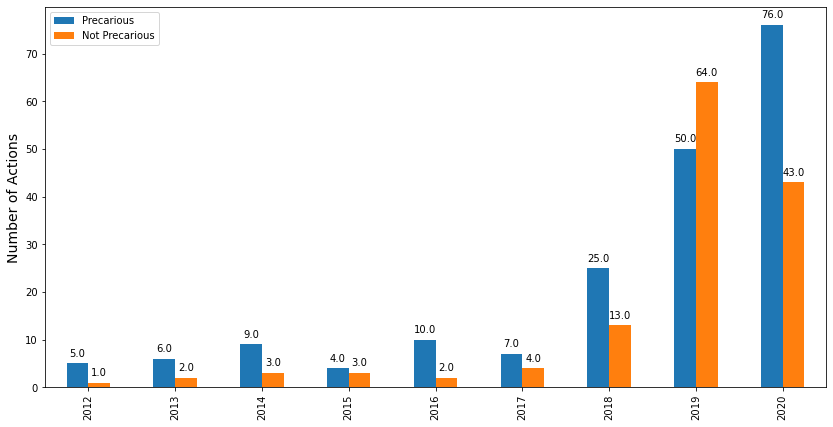

In [9]:
is_p = df[df["precarious"]==True]["year"].value_counts(sort=False).rename("Precarious")
not_p = df[df["precarious"]==False]["year"].value_counts(sort=False).rename("Not Precarious")
_df = pd.concat([is_p, not_p], axis=1)[-y:]

ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)


# Show actions per year by white collar, blue collar, vs gig worker

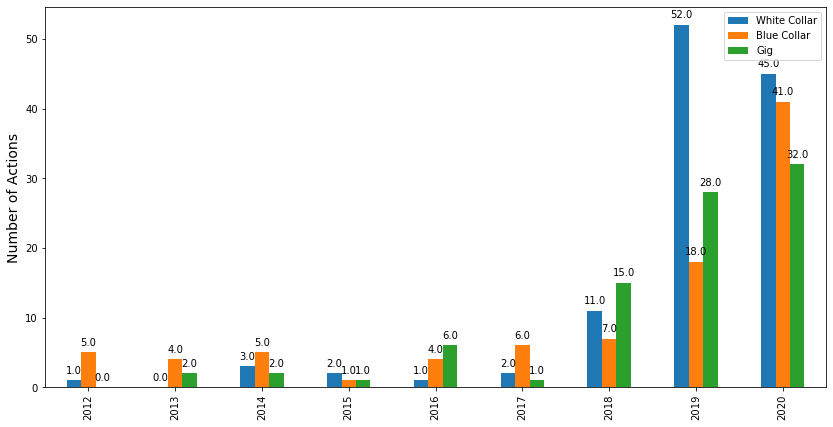

In [10]:
white_collar = (
    df[df["employment_types"].str.contains("white collar worker")]["year"]
    .value_counts(sort=False)
    .rename("White Collar")
)
blue_collar = (
    df[df["employment_types"].str.contains("blue collar worker")]["year"]
    .value_counts(sort=False)
    .rename("Blue Collar")
)
gig = (
    df[df["employment_types"].str.contains("gig worker")]["year"]
    .value_counts(sort=False)
    .rename("Gig")
)

_df = pd.concat([white_collar, blue_collar, gig], axis=1)[-y:]
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Show actions per year comparing online vs offline


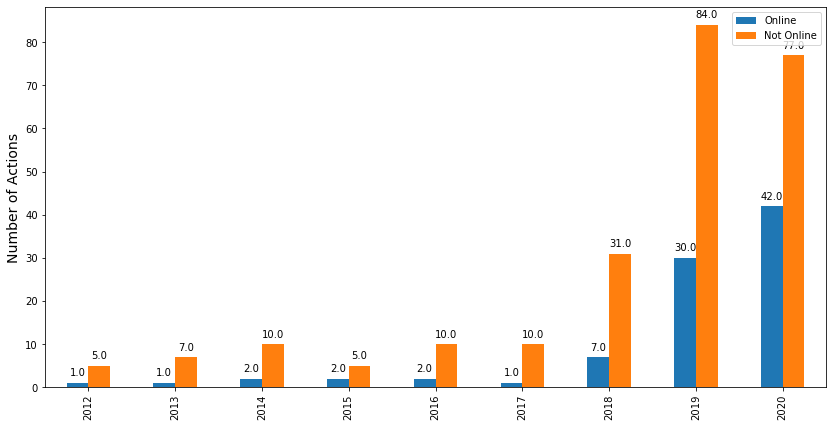

In [11]:
is_o = df[df["online"]==True]["year"].value_counts(sort=False).rename("Online")
not_o = df[df["online"]==False]["year"].value_counts(sort=False).rename("Not Online")
_df = pd.concat([is_o, not_o], axis=1)[-y:]
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Unionization rates

In [23]:
is_ur = df[(df["actions"].str.contains("union representation")) & (df["year"]==2020)]

is_ur_17 = len(df[(df["actions"].str.contains("union representation")) & (df["year"]==2017)])
is_ur_18 = len(df[(df["actions"].str.contains("union representation")) & (df["year"]==2018)])
is_ur_19 = len(df[(df["actions"].str.contains("union representation")) & (df["year"]==2019)])
is_ur_20 = len(df[(df["actions"].str.contains("union representation")) & (df["year"]==2020)])
print(is_ur_17, is_ur_18, is_ur_19, is_ur_20)
is_ur[["date", "locations", "employment_types", "companies", "description"]]


3 2 7 11


,date,locations,employment_types,companies,description
230,2020-01-01,hong kong-china,white collar workers,None,The Hong Kong Information Technology Workers’ ...
233,2020-02-03,chicago-illinois-usa,"blue collar workers, gig workers",instacart,A group of Instacart employees in the Chicago ...
239,2020-02-18,new york city-new york-usa,white collar workers,kickstarter,Employees at the crowdfunding platform Kicksta...
244,2020-03-13,new york city-new york-usa,"white collar workers, inhouse workers",glitch,Employees of online software collaboration too...
252,2020-03-19,brooklyn-new york city-new york-usa,"white collar workers, contract workers, inhous...","spotify, gimlet media","The staff of podcasting company Gimlet Media, ..."
289,2020-06-12,toronto-ontario-canada,gig workers,foodora,Foodora couriers overwhelmingly voted to join ...
295,2020-06-26,toronto-canada,gig workers,uber,Approximately 300 Uber Black drivers in the To...
300,2020-07-20,zurich-switzerland,"white collar workers, inhouse workers",google,Employees at Google's Zurich office voted to r...
308,2020-08-13,berlin-germany,"white collar workers, contract workers",N26,After workers of N26 (digital bank) announced ...
326,2020-10-05,None,"white collar workers, inhouse workers","spotify, parcast","Parcast, a Spotify-owned podcast company, anno..."


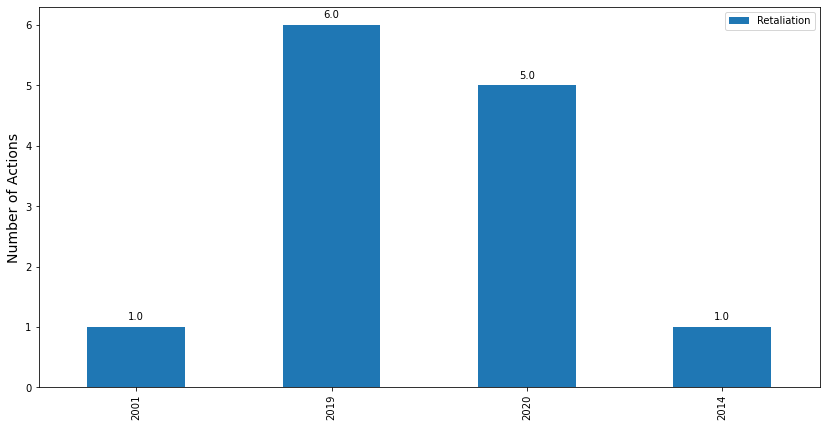

In [13]:
is_r = df[df["tags"].str.contains("retaliation")]["year"].value_counts(sort=False).rename("Retaliation")
_df = pd.concat([is_r], axis=1)[-y:]
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Show actions per year by open letter


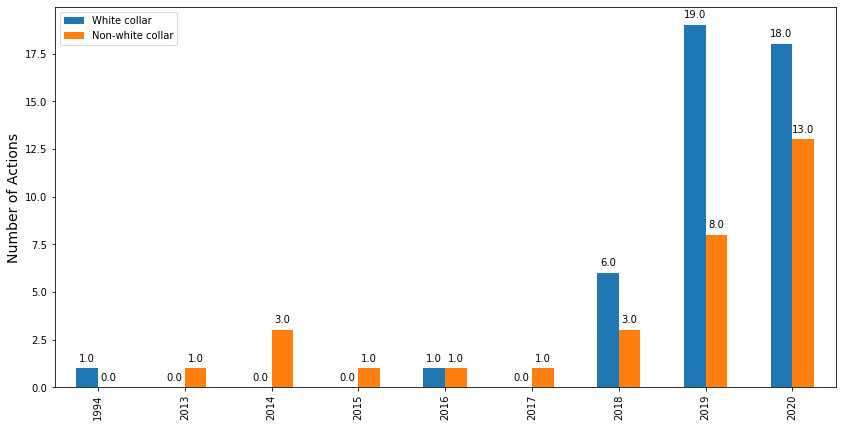

In [26]:
is_ol_wc = df[(df["actions"]=='open letter') & (df["employment_types"].str.contains("white"))]["year"].value_counts(sort=False).rename("White collar")
is_ol_nwc = df[(df["actions"]=='open letter') & (~df["employment_types"].str.contains("white"))]["year"].value_counts(sort=False).rename("Non-white collar")

_df = pd.concat([is_ol_wc, is_ol_nwc], axis=1)[-y:]
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Show actions per year by struggle type

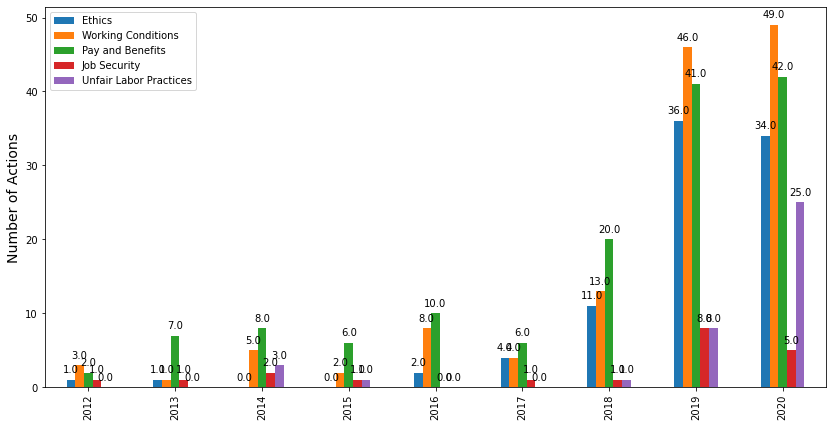

In [22]:
ethics = (
    df[df["struggles"].str.contains("ethics")]["year"]
    .value_counts(sort=False)
    .rename("Ethics")
)
working_conditions = (
    df[df["struggles"].str.contains("working conditions")]["year"]
    .value_counts(sort=False)
    .rename("Working Conditions")
)
pay_benefits = (
    df[df["struggles"].str.contains("pay and benefits")]["year"]
    .value_counts(sort=False)
    .rename("Pay and Benefits")
)
job_security = (
    df[df["struggles"].str.contains("job security")]["year"]
    .value_counts(sort=False)
    .rename("Job Security")
)
unfair_labor_practices = (
    df[df["struggles"].str.contains("unfair labor practices")]["year"]
    .value_counts(sort=False)
    .rename("Unfair Labor Practices")
)

_df = pd.concat([ethics, working_conditions, pay_benefits, job_security, unfair_labor_practices], axis=1)[-y:]
ax = _df.plot(kind="bar",)
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# NOTE: some actions are motivated by multiple struggles, and so will be double-counted in the graph below.

# Show actions by FAAMG (Facebook, Apple, Amazon, Microsoft, Google)

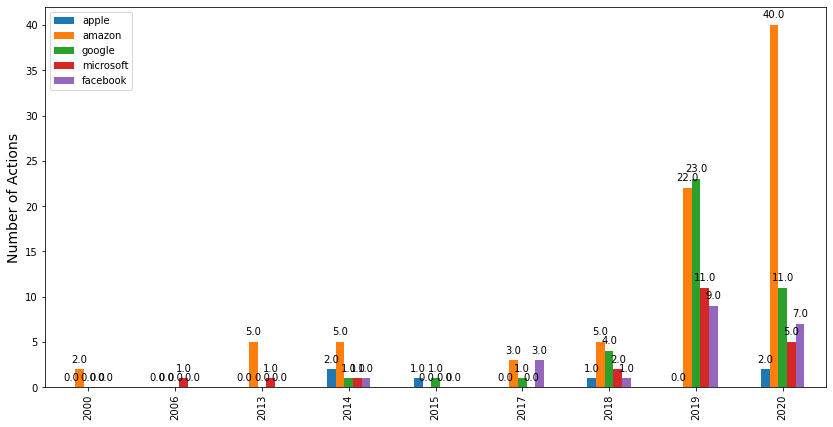

In [35]:
google = (
    df[df["companies"].str.contains("google")]["year"]
    .value_counts(sort=False)
    .rename("google")
)
amazon = (
    df[df["companies"].str.contains("amazon")]["year"]
    .value_counts(sort=False)
    .rename("amazon")
)
apple = (
    df[df["companies"].str.contains("apple")]["year"]
    .value_counts(sort=False)
    .rename("apple")
)
microsoft = (
    df[df["companies"].str.contains("microsoft")]["year"]
    .value_counts(sort=False)
    .rename("microsoft")
)
facebook = (
    df[df["companies"].str.contains("facebook")]["year"]
    .value_counts(sort=False)
    .rename("facebook")
)

_df = pd.concat([apple, amazon, google, microsoft, facebook], axis=1)[-y:]
ax = _df.plot(kind="bar",)
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Big tech (FAAMG) vs other

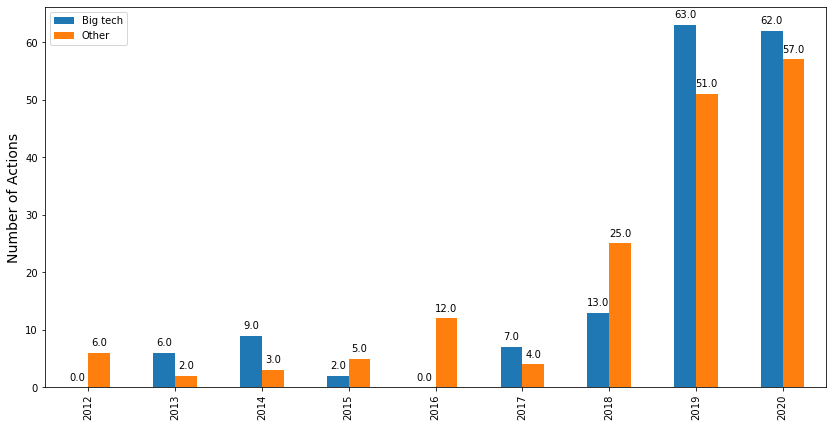

In [17]:
big_tech = ["apple", "google", "amazon", "facebook", "microsoft"]
is_b = df[df["companies"].str.contains('|'.join(big_tech))]["year"].value_counts(sort=False).rename("Big tech")
not_b = df[~df["companies"].str.contains('|'.join(big_tech))]["year"].value_counts(sort=False).rename("Other")
_df = pd.concat([is_b, not_b], axis=1)[-y:]
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Covid-19 actions in 2020

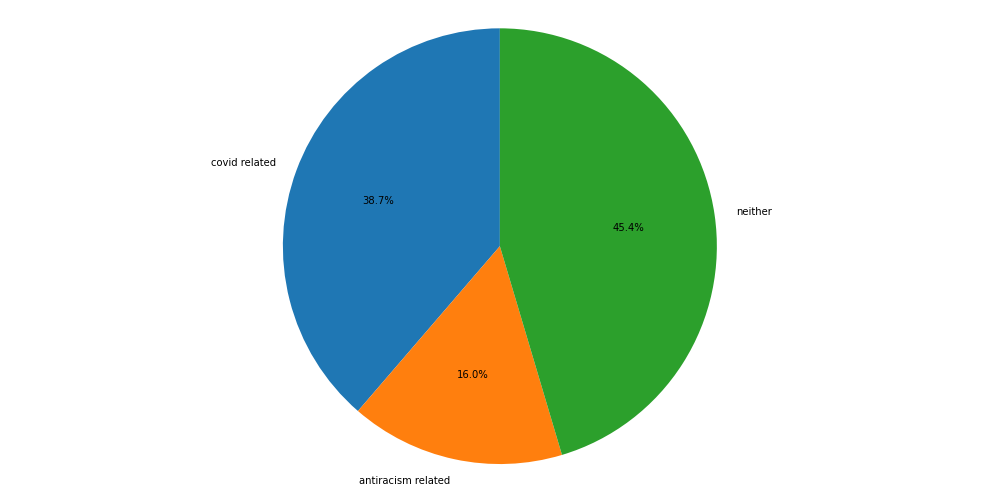

[46, 19, 54]

In [28]:
is_covid = len(df[(df["year"] == 2020) & (df["tags"].str.contains("coronavirus"))])
is_antiracism = len(df[(df["year"] == 2020) & (df["tags"].str.contains("antiracism"))])
not_covid_nor_antiracism = len(df[(df["year"] == 2020) & (~df["tags"].str.contains("coronavirus")) & (~df["tags"].str.contains("antiracism"))])

labels = ["covid related", "antiracism related", "neither"]
sizes = [is_covid, is_antiracism, not_covid_nor_antiracism]
# explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'covid related')

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes, labels=labels, autopct="%1.1f%%", startangle=90, # explode=explode, 
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()
sizes

# Actions by kinds of discrimination

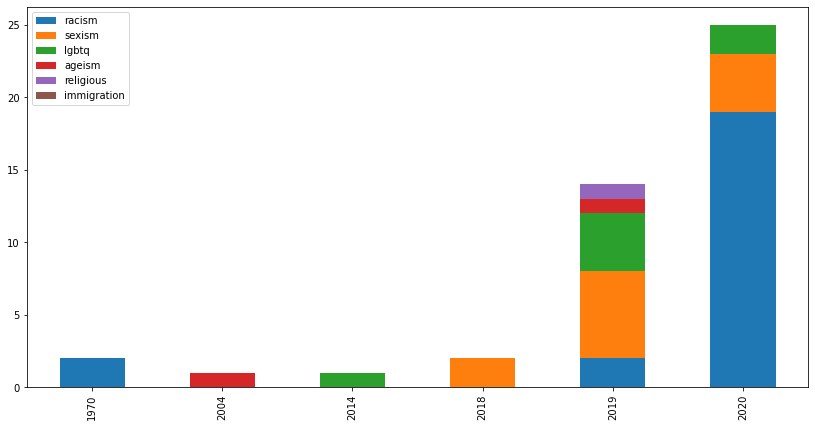

In [19]:
y = end_year - start_year
racism = (
    df[df["tags"].str.contains("antiracism")]["year"]
    .value_counts(sort=False)
    .rename("racism")
)
sexism = (
    df[df["tags"].str.contains("sexism")]["year"]
    .value_counts(sort=False)
    .rename("sexism")
)
lgbtq = (
    df[df["tags"].str.contains("lgbtq")]["year"]
    .value_counts(sort=False)
    .rename("lgbtq")
)
ageism = (
    df[df["tags"].str.contains("ageism")]["year"]
    .value_counts(sort=False)
    .rename("ageism")
)
religious = (
    df[df["tags"].str.contains("religious")]["year"]
    .value_counts(sort=False)
    .rename("religious")
)
immigration = (
    df[df["tags"].str.contains("immigration_status")]["year"]
    .value_counts(sort=False)
    .rename("immigration")
)

pd.concat([racism, sexism, lgbtq, ageism, religious, immigration], axis=1)[-y:].plot(
    kind="bar", stacked=True,
)

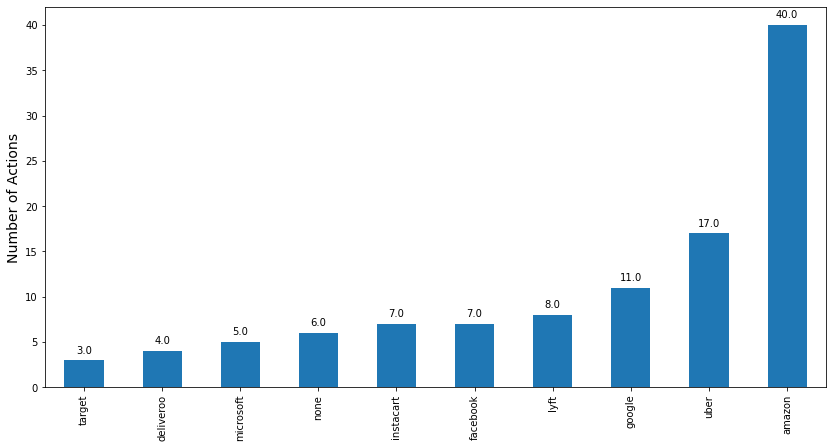

In [20]:
ohe_df = df[df["year"]==2020]["companies"].str.replace(" ", "").str.lower().str.get_dummies(sep=",")#.add_prefix(f"")
_df = ohe_df.sum().sort_values()[-10:]#.plot(kind='barh')
ax = _df.plot(kind="bar")
ax.set_ylabel("Number of Actions", fontsize=14)
add_value_labels(ax)

# Actions by month

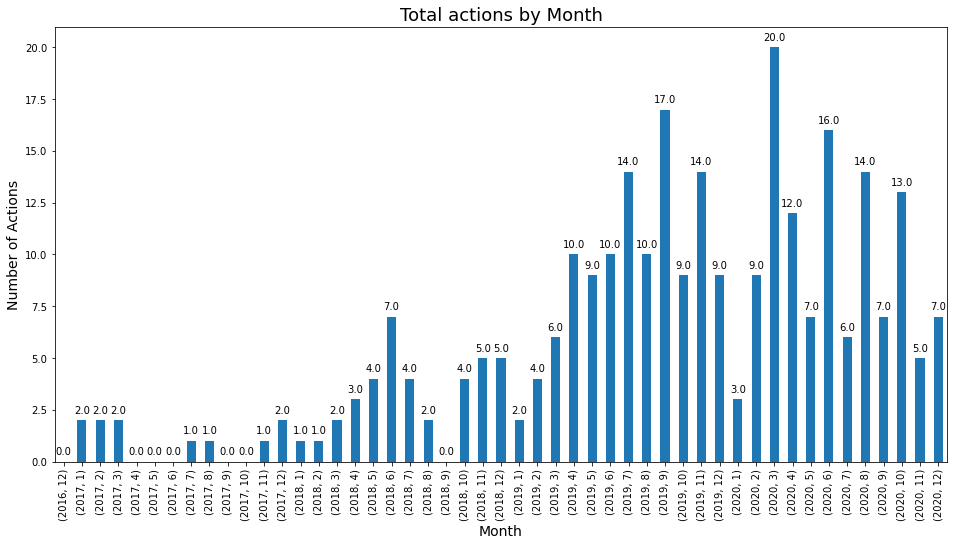

In [21]:
# fill dataframe with zeros for dates where no actions happened
sparse_df = df.loc[:, "date"].value_counts()

# set date range for month graph
today = datetime.today().date()
three_yrs_ago = f"{today.month}-{today.day}-{today.year-4}"
date_range_month = pd.date_range(three_yrs_ago, datetime.today().date())

# fill dataframe with zeros for dates where no actions happened
sparse_df = (
    df.loc[:, "date"]
    .value_counts()
    .reindex(date_range_month, fill_value=0)
    .to_frame(name="count")
)

# aggregate our dataframe by month
df_1 = sparse_df.groupby([(sparse_df.index.year),(sparse_df.index.month)]).sum()

# plot the bar graph with annotation|
ax = df_1.plot(kind="bar", figsize=(16, 8), legend=False)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Number of Actions", fontsize=14)
ax.set_title("Total actions by Month", fontsize=18)
add_value_labels(ax)

In [30]:
len(df[(df["companies"].str.contains("amazon")) * (df["year"]==2020)])

/home/jianshentan/anaconda3/envs/cait/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


40

In [34]:
len(df[(df["companies"].str.contains("amazon")) & (df["year"]==2020) & (df["tags"].str.contains("coronavirus"))])

30